# **Visualización**
# AE07. Seaborn Heatmaps, Histogramas y Boxplot

Veamos más tipos de gráficos en Seaborn:


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
sns.__version__ #Revisamos que estemos en la ultima versión de seaborn

'0.11.2'

In [ ]:
# Importamos las librerias adicionales para el manejo numerico y de DataFrame
import numpy as np
import pandas as pd

In [ ]:
sns.set(context='notebook',style='darkgrid',palette='dark')

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
penguins_df = pd.read_csv("/content/drive/MyDrive/02_Analisis Exploratorio y Estadistica/Archivos/VD02.csv").dropna()
penguins_df.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,male


## <font color='blue'>Matriz de correlación y Mapas de calor (Heatmap)</font>

Utilizando matplotlib, generar un mapa de calor con anotaciones eran varias líneas de código, era difícil que los valores numéricos quedaran correctamente alineados al centro de cada valor de heatmap, y eran varios métodos para construir un heatmap de principio a fin. `Seaborn` implementa el método `sns.heatmap(data)`, el cual realiza todas las operaciones necesarias para generar un mapa de calor. El parametro `data` puede ser tanto un `DataFrame` o una matriz de Numpy, recordar que si utilizamos un `DataFrame`, `Seaborn` va a extraer los nombres de las filas y columnas asociadas a la matriz a graficar.

Además, utilizando el parámetro `annot=True`, permitimos generar un heatmap con anotaciones. Estas anotaciones estarán correctamente alineadas y el uso de color se generará automáticamente para una máxima legibilidad de las anotaciones:

[Documentación Heatmap](https://seaborn.pydata.org/generated/seaborn.heatmap.html?highlight=heatmap#seaborn.heatmap)


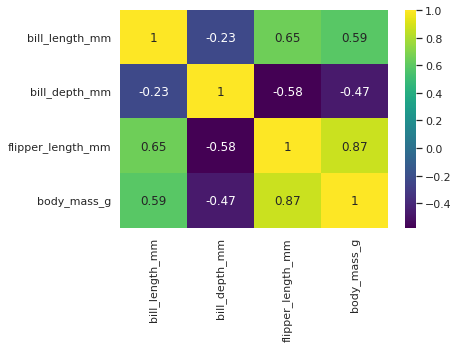

In [ ]:
corr = penguins_df.corr() # Obtenemos la matriz de correlación para las variables númericas del set de datos de pingüinos

sns.heatmap(corr,annot=True, cmap='viridis') #Generamos el heatmap anotado
plt.show()

## <font color='blue'>Histogramas</font>

Recientemente, en la última versión de Seaborn (0.11), se implementó el método `histplot`. Tal como lo menciona el título de esta sección, corresponde al uso de histogramas, y la lógica de uso se mantiene. Existe un parámetro, denominado `kde`, el cual recibe un valor `Booleano` y nos permite graficar el *Kernel Density Estimate*. Esta característica permite estimar una distribución continua desde el histograma, y por lo mismo podríamos ver la existencia de asimetría presente en los datos a graficar.

[Documentación Histplot](https://seaborn.pydata.org/generated/seaborn.histplot.html?highlight=histplot#seaborn.histplot)


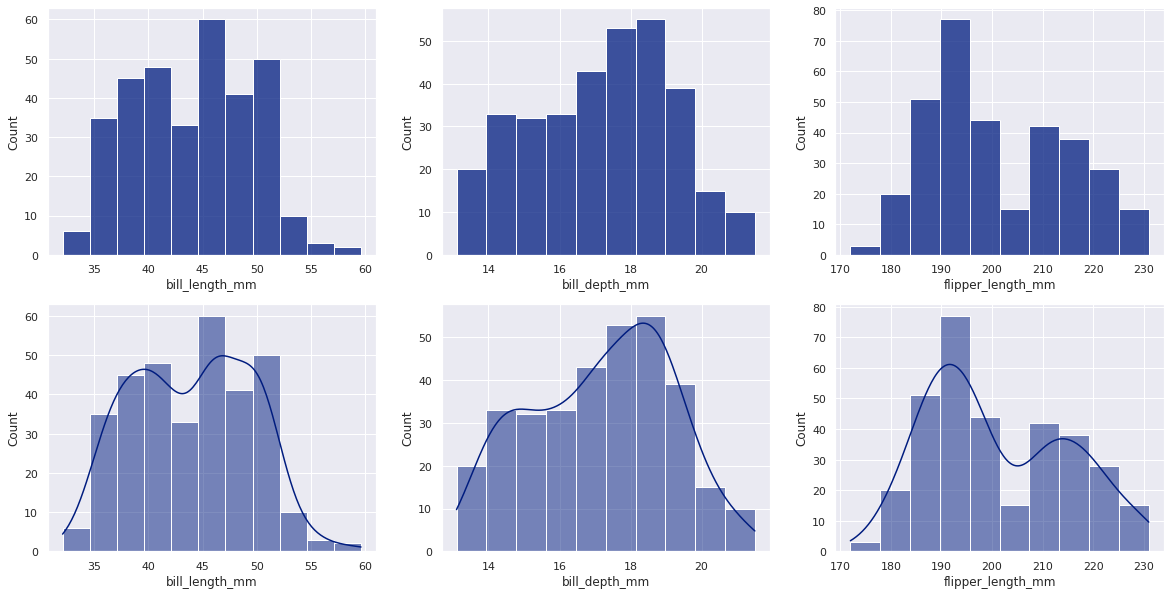

In [ ]:
fig, ax = plt.subplots(2,3, figsize=(20,10), )

# subplots con el método histoplot a secas
sns.histplot(x='bill_length_mm', data = penguins_df, ax = ax[0,0])
sns.histplot(x='bill_depth_mm', data = penguins_df, ax = ax[0,1])
sns.histplot(x='flipper_length_mm', data = penguins_df, ax = ax[0,2])

# #subplots con el método histplot y el gráfico de KDE
sns.histplot(x='bill_length_mm', data = penguins_df, kde=True, ax = ax[1,0])
sns.histplot(x='bill_depth_mm', data = penguins_df, kde=True, ax = ax[1,1])
sns.histplot(x='flipper_length_mm', data = penguins_df, kde=True, ax = ax[1,2])

plt.show()

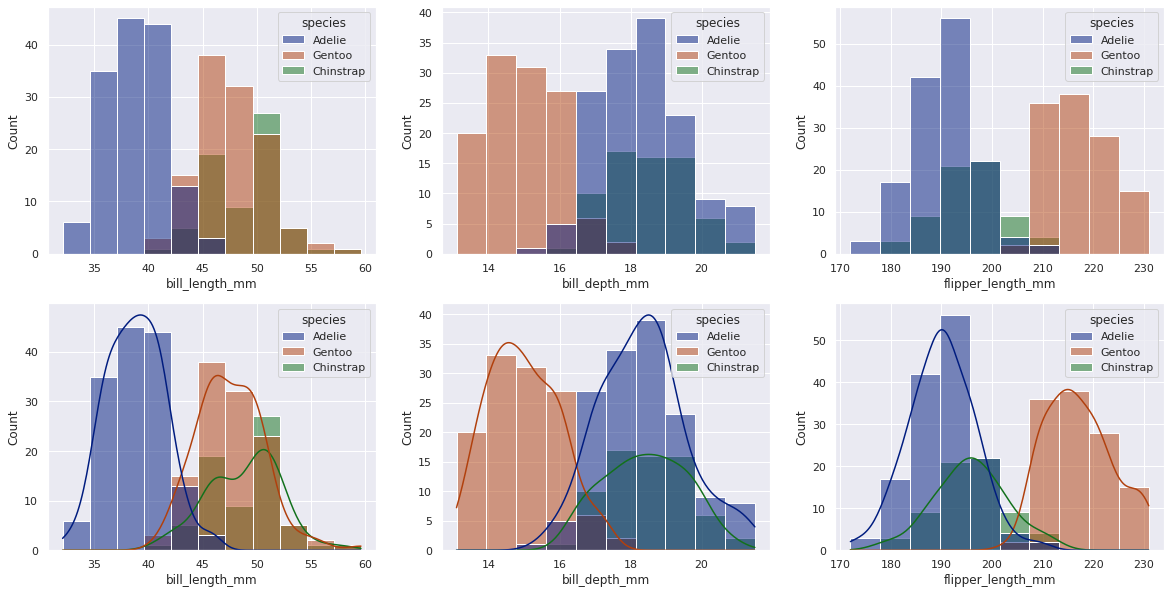

In [ ]:
fig, ax = plt.subplots(2,3, figsize=(20,10), )

# subplots con el método histoplot a secas
sns.histplot(x='bill_length_mm', data = penguins_df, ax = ax[0,0], hue='species')
sns.histplot(x='bill_depth_mm', data = penguins_df, ax = ax[0,1], hue='species')
sns.histplot(x='flipper_length_mm', data = penguins_df, ax = ax[0,2], hue='species')

# #subplots con el método histplot y el gráfico de KDE
sns.histplot(x='bill_length_mm', data = penguins_df, kde=True, ax = ax[1,0], hue='species')
sns.histplot(x='bill_depth_mm', data = penguins_df, kde=True, ax = ax[1,1], hue='species')
sns.histplot(x='flipper_length_mm', data = penguins_df, kde=True, ax = ax[1,2], hue='species')

plt.show()

##<font color='blue'>Diagramas de caja y bigotes (Boxplots)</font>

`Seaborn`, como buena librería de cómputo estadístico también provee el método para realizar diagramas de cajas y bigotes. Las ventajas siguen siendo la facilidad de uso de `Seaborn` por sobre `matplotlib`, además de la mejora estética al momento de uso de colores, y modificaciones a los marcadores de outlets:

[Documentación Boxplots](https://seaborn.pydata.org/generated/seaborn.boxplot.html?highlight=boxplot#seaborn.boxplot)


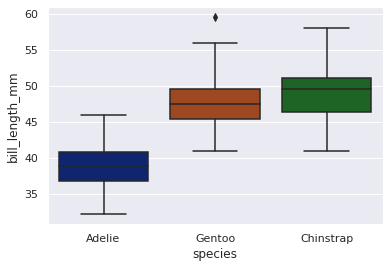

In [ ]:
sns.boxplot(x='species',y='bill_length_mm',data=penguins_df)
plt.show()

Recordando que al estar utilizando `seaborn`, podemos hacer la separación de nuestros gráficos según las columnas que nosotros especifiquemos. A modo de ejemplo, separaremos los boxplots obtenidos anteriormente por la columna `sex`:

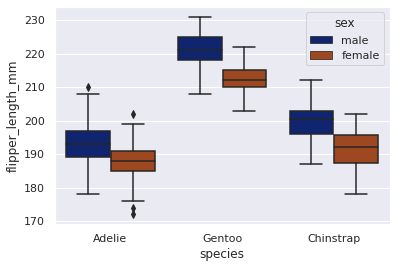

In [ ]:
sns.boxplot(x='species',y='flipper_length_mm',data=penguins_df,hue='sex')
plt.show()

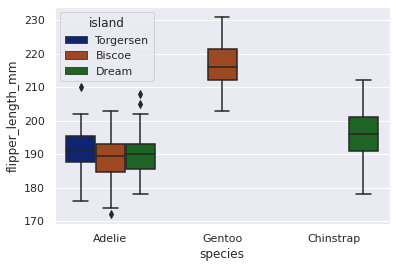

In [ ]:
sns.boxplot(x='species',y='flipper_length_mm',data=penguins_df,hue='island')
plt.show()